## Target guided encodings

In the previous lectures in this section, we learned how to convert a label into a number, by using one hot encoding, replacing by a digit or replacing by frequency or counts of observations. These methods are simple, make (almost) no assumptions and work generally well in different scenarios.

There are however methods that allow us to capture information while pre-processing the labels of categorical variables. These methods include:

- Ordering the labels according to the target
- Replacing labels by the target mean (mean encoding / target encoding)
- Replacing the labels by the probability ratio of the target being 1 or 0
- Weight of evidence.

All of the above methods have something in common:

- the encoding is **guided by the target**, and
- they create a **monotonic relationship** between the variable and the target.


### Monotonicity

A monotonic relationship is a relationship that does one of the following:

- (1) as the value of one variable increases, so does the value of the other variable; or
- (2) as the value of one variable increases, the value of the other variable decreases.

In this case, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target value decreases.



### Advantages of target guided encodings

- Capture information within the category, therefore creating more predictive features
- Create a monotonic relationship between the variable and the target, therefore suitable for linear models
- Do not expand the feature space


### Limitations

- Prone to cause over-fitting
- Difficult to cross-validate with current libraries


### Note

The methods discussed in this and the coming 3 lectures can be also used on numerical variables, after discretisation. This creates a monotonic relationship between the numerical variable and the target, and therefore improves the performance of linear models. I will discuss this in more detail in the section "Discretisation".

===============================================================================

## Mean Encoding or Target Encoding

Mean encoding implies replacing the category by the average target value for that category. For example, if we have the variable city, with categories London, Manchester and Bristol, and we want to predict the default rate, if the default rate for London is 30% we replace London by 0.3, if the default rate for Manchester is 20% we replace Manchester by 0.2 and so on.


## In this demo:

We will see how to perform one hot encoding with:
- pandas
- Feature-Engine

the exercise is based on the training notes:
Feature Engineering for Machine Learning
by Soledad Galli

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

# for encoding with feature-engine
from feature_engine.categorical_encoders import MeanCategoricalEncoder

# Dataset
This data approach student achievement in secondary education of two Portuguese schools. 
The data attributes include student grades, demographic, social and school related features) 
and it was collected by using school reports and questionnaires.
the target, G3 is the final year grade (issued at the 3rd period)


In [2]:
columns = [ 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
             'Dalc', 'Walc' , 'health', 'G3']
data_raw = pd.read_csv('C:\\Users\gusal\machine learning\Feature engineering\student-por.csv', delimiter= ';' ,usecols = columns)

In [3]:
data_raw.head(5)

,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,Dalc,Walc,health,G3
0,at_home,teacher,course,mother,yes,no,no,no,1,1,3,11
1,at_home,other,course,father,no,yes,no,no,1,1,3,11
2,at_home,other,other,mother,yes,no,no,no,2,3,3,12
3,health,services,home,mother,no,yes,no,yes,1,1,5,14
4,other,other,home,father,no,yes,no,no,1,2,5,13


In [4]:
data_raw.dtypes

Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
Dalc           int64
Walc           int64
health         int64
G3             int64
dtype: object

In [5]:
# let's have a look at how many labels each variable has

for col in data_raw.columns:
    print(col, ': ', len(data_raw[col].unique()), ' labels')

Mjob :  5  labels
Fjob :  5  labels
reason :  4  labels
guardian :  3  labels
schoolsup :  2  labels
famsup :  2  labels
paid :  2  labels
activities :  2  labels
Dalc :  5  labels
Walc :  5  labels
health :  5  labels
G3 :  17  labels


# Counting the items per each label

In [6]:

for col in data_raw.columns:
    print(col, ':\n ', data_raw[col].value_counts().sort_values(ascending=False),'\n ')

Mjob :
  other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64 
 
Fjob :
  other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64 
 
reason :
  course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64 
 
guardian :
  mother    455
father    153
other      41
Name: guardian, dtype: int64 
 
schoolsup :
  no     581
yes     68
Name: schoolsup, dtype: int64 
 
famsup :
  yes    398
no     251
Name: famsup, dtype: int64 
 
paid :
  no     610
yes     39
Name: paid, dtype: int64 
 
activities :
  no     334
yes    315
Name: activities, dtype: int64 
 
Dalc :
  1    451
2    121
3     43
4     17
5     17
Name: Dalc, dtype: int64 
 
Walc :
  1    247
2    150
3    120
4     87
5     45
Name: Walc, dtype: int64 
 
health :
  5    249
3    124
4    108
1     90
2     78
Name: health, dtype: int64 
 
G3 :
  11    104
10     97
13     82
12     72
14     

### Encoding important

We calculate the target mean per category using the train set, and then use those mappings in the test set.

Note that for the pandas implementation we need to keep the target in the training set:

In [7]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data_raw,  # this time we keep the target!!
    data_raw.G3,  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((454, 12), (195, 12))

### Explore original relationship between categorical variables and target

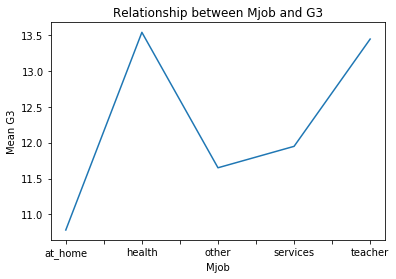

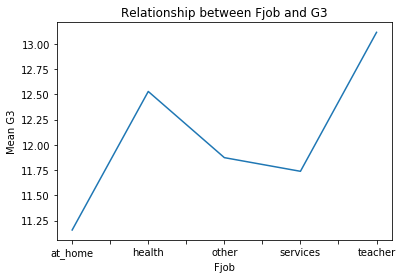

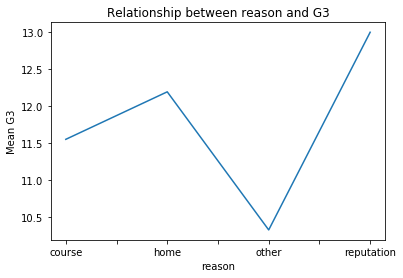

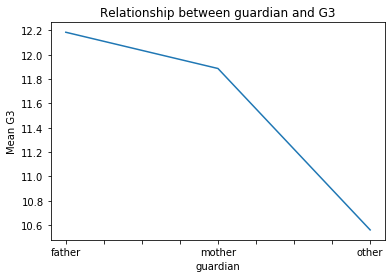

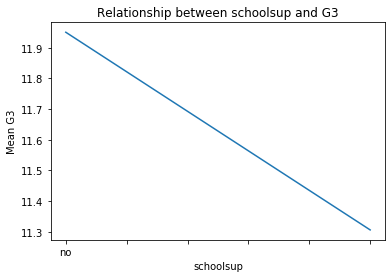

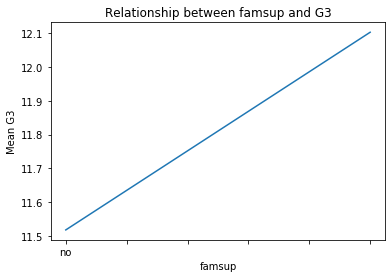

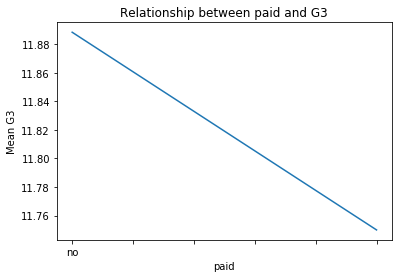

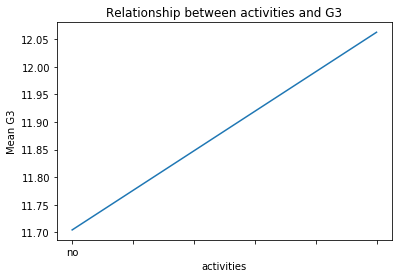

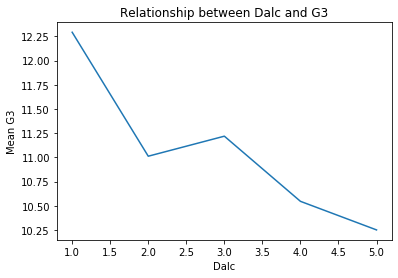

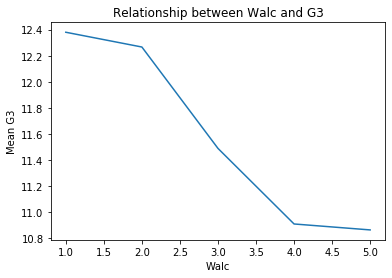

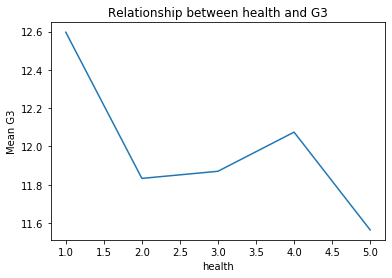

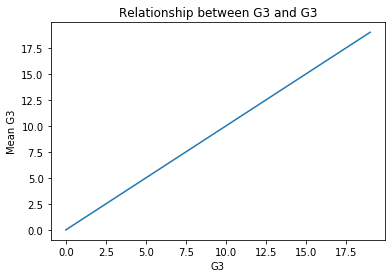

In [8]:
# let's explore the relationship of the categories with the target

for var in X_train.columns:
    
    fig = plt.figure()
    fig = X_train.groupby([var])['G3'].mean().plot()
    fig.set_title('Relationship between {} and G3'.format(var))
    fig.set_ylabel('Mean G3')
    plt.show()

monotonic relations between G3 and: guardian, Schoolsup, famsup, paid, activities, 



## Mean encoding with pandas


### Advantages

- quick
- returns pandas dataframe

### Limitations of pandas:

- it does not preserve information from train data to propagate to test data

We need to store the mappings separately if planning to use the model in production.

In [9]:
# and now let's do the same but capturing the result in a dictionary
for col in X_train.columns:
    ordered_labels = X_train.groupby([col])['G3'].mean().to_dict()
    print('ordered labels for {}: {}\n' .format(col, ordered_labels) )


ordered labels for Mjob: {'at_home': 10.780219780219781, 'health': 13.542857142857143, 'other': 11.65, 'services': 11.94949494949495, 'teacher': 13.448979591836734}

ordered labels for Fjob: {'at_home': 11.15625, 'health': 12.529411764705882, 'other': 11.873517786561266, 'services': 11.738095238095237, 'teacher': 13.115384615384615}

ordered labels for reason: {'course': 11.551724137931034, 'home': 12.194174757281553, 'other': 10.326530612244898, 'reputation': 13.0}

ordered labels for guardian: {'father': 12.184466019417476, 'mother': 11.886503067484663, 'other': 10.56}

ordered labels for schoolsup: {'no': 11.950617283950617, 'yes': 11.306122448979592}

ordered labels for famsup: {'no': 11.517441860465116, 'yes': 12.102836879432624}

ordered labels for paid: {'no': 11.888372093023255, 'yes': 11.75}

ordered labels for activities: {'no': 11.704347826086957, 'yes': 12.0625}

ordered labels for Dalc: {1: 12.292993630573248, 2: 11.011764705882353, 3: 11.21875, 4: 10.545454545454545, 5: 1

In [10]:
# now, we replace the labels with the target means

In [11]:
def find_category_mappings(df, variable, target):
    return df.groupby([variable])[target].mean().to_dict()


def integer_encode(train, test, variable, ordinal_mapping):

    X_train[variable] = X_train[variable].map(ordinal_mapping)
    X_test[variable] = X_test[variable].map(ordinal_mapping)

In [12]:
# and now we run a loop over all the categorical variables

for variable in columns:
    mappings = find_category_mappings(X_train, variable, 'G3')
    integer_encode(X_train, X_test, variable, mappings)

C:\Users\gusal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\gusal\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
X_train.head()

,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,Dalc,Walc,health,G3
561,10.780220,11.156250,11.551724,11.886503,11.950617,12.102837,11.888372,12.062500,12.292994,10.907692,11.564246,10
452,11.650000,11.873518,11.551724,11.886503,11.950617,12.102837,11.888372,11.704348,12.292994,12.380117,12.075000,11
89,13.448980,12.529412,13.000000,11.886503,11.950617,12.102837,11.888372,11.704348,11.218750,10.862069,11.564246,10
299,11.650000,11.873518,11.551724,10.560000,11.950617,12.102837,11.750000,12.062500,12.292994,12.266667,11.833333,12
231,11.949495,12.529412,12.194175,12.184466,11.950617,12.102837,11.888372,11.704348,11.011765,10.907692,12.075000,10


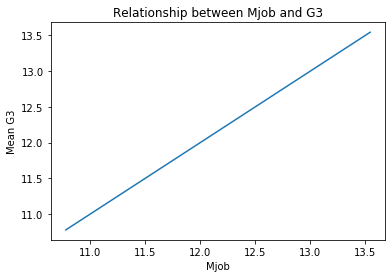

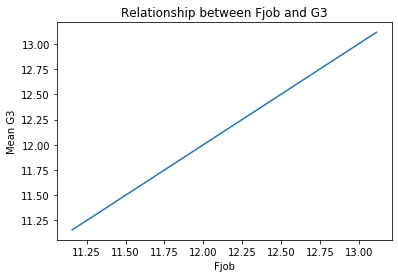

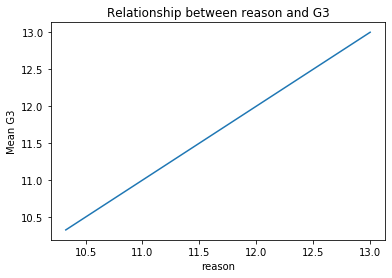

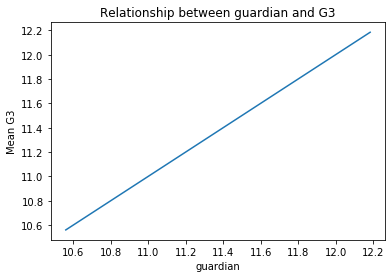

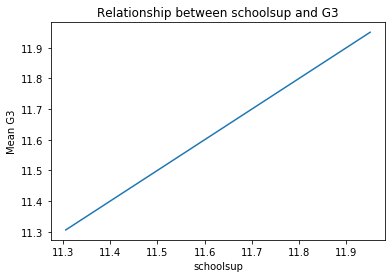

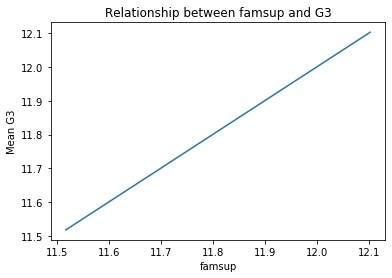

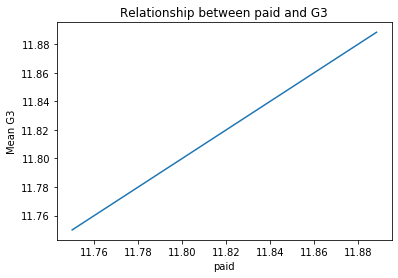

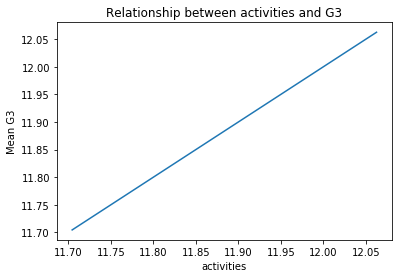

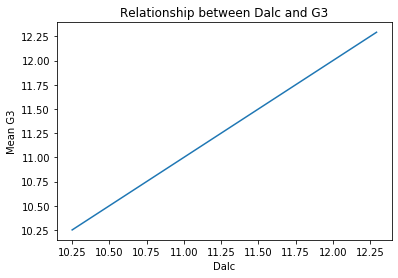

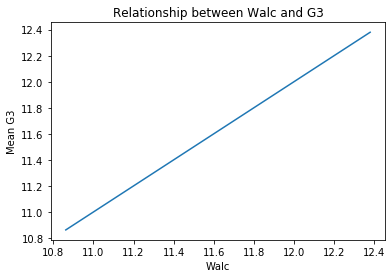

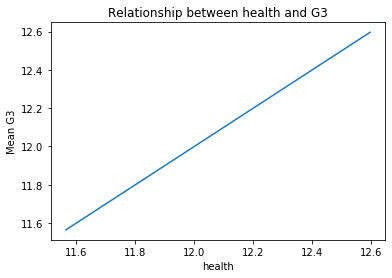

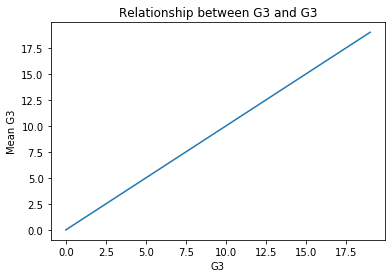

In [14]:
# let's explore the relationship of the categories with the target

for var in X_train.columns:
    
    fig = plt.figure()
    fig = X_train.groupby([var])['G3'].mean().plot()
    fig.set_title('Relationship between {} and G3'.format(var))
    fig.set_ylabel('Mean G3')
    plt.show()

In [15]:
X_train.dtypes

Mjob          float64
Fjob          float64
reason        float64
guardian      float64
schoolsup     float64
famsup        float64
paid          float64
activities    float64
Dalc          float64
Walc          float64
health        float64
G3              int64
dtype: object

Mean Encoding creates linear relationships between the mean target and the categories.

### Note

Replacing categorical labels with this code and method will generate missing values for categories present in the test set that were not seen in the training set. Therefore it is extremely important to handle rare labels before-hand. I will explain how to do this, in a later notebook.

## Mean Encoding with Feature-Engine

If using Feature-Engine, instead of pandas, we do not need to keep the target variable in the training dataset.

In [16]:
# Some of the variables are not categorical. Please cast them as object before calling the MeanCategoricalEncoder

In [17]:
data_raw.Dalc = data_raw.Dalc.astype(object)
data_raw.Walc = data_raw.Walc.astype(object)
data_raw.health = data_raw.health.astype(object)


In [26]:
inputs = data_raw.drop(['G3'], axis = 1)
target = data_raw.G3

In [36]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    inputs,  # predictors
    target,  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((454, 11), (195, 11))

In [37]:
X_train.columns

Index(['Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'Dalc', 'Walc', 'health'],
      dtype='object')

In [38]:
mean_enc = MeanCategoricalEncoder(
    variables = ['Mjob', 'Fjob', 'reason', 'guardian','schoolsup', 'famsup', 'paid', 'activities',
                                  'Dalc', 'Walc', 'health'])

In [39]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

mean_enc.fit(X_train, y_train)

MeanCategoricalEncoder(variables=['Mjob', 'Fjob', 'reason', 'guardian',
                                  'schoolsup', 'famsup', 'paid', 'activities',
                                  'Dalc', 'Walc', 'health'])

In [40]:
# in the encoder dict we see the target mean assigned to each
# category for each of the selected variables

mean_enc.encoder_dict_

{'Mjob': {'at_home': 10.780219780219781,
  'health': 13.542857142857143,
  'other': 11.65,
  'services': 11.94949494949495,
  'teacher': 13.448979591836734},
 'Fjob': {'at_home': 11.15625,
  'health': 12.529411764705882,
  'other': 11.873517786561266,
  'services': 11.738095238095237,
  'teacher': 13.115384615384615},
 'reason': {'course': 11.551724137931034,
  'home': 12.194174757281553,
  'other': 10.326530612244898,
  'reputation': 13.0},
 'guardian': {'father': 12.184466019417476,
  'mother': 11.886503067484663,
  'other': 10.56},
 'schoolsup': {'no': 11.950617283950617, 'yes': 11.306122448979592},
 'famsup': {'no': 11.517441860465116, 'yes': 12.102836879432624},
 'paid': {'no': 11.888372093023255, 'yes': 11.75},
 'activities': {'no': 11.704347826086957, 'yes': 12.0625},
 'Dalc': {1: 12.292993630573248,
  2: 11.011764705882353,
  3: 11.21875,
  4: 10.545454545454545,
  5: 10.25},
 'Walc': {1: 12.380116959064328,
  2: 12.266666666666667,
  3: 11.488095238095237,
  4: 10.907692307692

In [41]:
# this is the list of variables that the encoder will transform

mean_enc.variables

['Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'Dalc',
 'Walc',
 'health']

In [42]:
X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

# let's explore the result
X_train.head()

,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,Dalc,Walc,health
561,10.780220,11.156250,11.551724,11.886503,11.950617,12.102837,11.888372,12.062500,12.292994,10.907692,11.564246
452,11.650000,11.873518,11.551724,11.886503,11.950617,12.102837,11.888372,11.704348,12.292994,12.380117,12.075000
89,13.448980,12.529412,13.000000,11.886503,11.950617,12.102837,11.888372,11.704348,11.218750,10.862069,11.564246
299,11.650000,11.873518,11.551724,10.560000,11.950617,12.102837,11.750000,12.062500,12.292994,12.266667,11.833333
231,11.949495,12.529412,12.194175,12.184466,11.950617,12.102837,11.888372,11.704348,11.011765,10.907692,12.075000


In [43]:
X_test.head()

,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,Dalc,Walc,health
532,13.542857,11.738095,10.326531,11.886503,11.950617,11.517442,11.888372,11.704348,12.292994,10.907692,11.564246
375,10.780220,11.156250,12.194175,12.184466,11.950617,11.517442,11.888372,11.704348,11.011765,11.488095,11.833333
306,11.650000,11.873518,13.000000,11.886503,11.950617,12.102837,11.888372,12.062500,11.218750,10.907692,12.596774
625,10.780220,11.738095,11.551724,12.184466,11.950617,12.102837,11.888372,11.704348,12.292994,12.266667,12.075000
480,10.780220,11.738095,11.551724,10.560000,11.950617,11.517442,11.888372,11.704348,12.292994,12.380117,11.833333


**Note**

If the argument variables is left to None, then the encoder will automatically identify all categorical variables. Is that not sweet?

The encoder will not encode numerical variables. So if some of your numerical variables are in fact categories, you will need to re-cast them as object before using the encoder.

Finally, if there is a label in the test set that was not present in the train set, the encoder will through and error, to alert you of this behaviour.